In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
import math
import re
import pyodbc
import pandasql as ps
from pandasql import sqldf
from datetime import date
import sqlalchemy

In [2]:
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', None)

In [3]:
#1.  Heritage_sales (Database name)
server_PROD = 'sqledwrpt' 
database = 'DM_Finance'
cnxn = pyodbc.connect('DRIVER={ODBC Driver 13 for SQL Server};SERVER='+server_PROD+';DATABASE='+database+';Trusted_Connection=yes;')
cursor = cnxn.cursor()

query = """

select source, MonthYear, Year,sum(Sales) [SumMonth]
from [DM_Finance].dbo.fin_heritage_sales
group by source, MonthYear, Year


"""
df_DART_heritage_sales = pd.read_sql(query, cnxn)


# Close the connection
cursor.close()
cnxn.close()

df = df_DART_heritage_sales
df

df.SumMonth.mean()

df.SumMonth.std()

upper_limit = df.SumMonth.mean() + 2*df.SumMonth.std()
upper_limit

lower_limit = df.SumMonth.mean() -2*df.SumMonth.std()
lower_limit

df_outlier = df[(df.SumMonth>upper_limit) | (df.SumMonth<lower_limit)]

df_outlier.shape

df_outlier.head()

,source,MonthYear,Year,SumMonth
19,Heritage,202208,2022,8576134.84


In [4]:
df = df_DART_heritage_sales
df

,source,MonthYear,Year,SumMonth
0,Heritage,202101,2021,4877042.48
1,Heritage,202102,2021,4702008.06
2,Heritage,202103,2021,6454326.07
3,Heritage,202104,2021,5286222.03
4,Heritage,202105,2021,5147343.02
5,Heritage,202106,2021,5325711.13
6,Heritage,202107,2021,5037586.75
7,Heritage,202108,2021,5170180.58
8,Heritage,202109,2021,5282237.23
9,Heritage,202110,2021,5168303.79


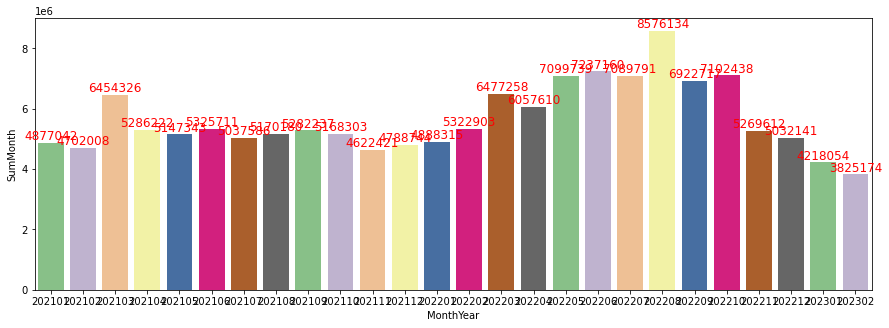

In [5]:
plt.figure(figsize=(15,5))
sns.barplot(x='MonthYear', y ='SumMonth',  data= df, palette='Accent')
#sns.barplot(x='MonthYear', y ='SumMonth', color ='red',  data= df )

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), fontsize =12, color = 'red', ha ='center',va = 'bottom' )
    
